In [29]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import os
for dirname, _, filenames in os.walk('/projects'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('GoodReadsAwards.csv',error_bad_lines=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         3660 non-null   int64  
 1   rank        3660 non-null   int64  
 2   votes       3660 non-null   int64  
 3   title       3660 non-null   object 
 4   category    3660 non-null   object 
 5   year        3660 non-null   int64  
 6   authors     3660 non-null   object 
 7   avg_rating  3660 non-null   float64
 8   pages       3590 non-null   float64
 9   published   3507 non-null   object 
 10  publisher   3660 non-null   object 
 11  5stars      3660 non-null   int64  
 12  4stars      3660 non-null   int64  
 13  3stars      3660 non-null   int64  
 14  2stars      3660 non-null   int64  
 15  1stars      3660 non-null   int64  
 16  ratings     3660 non-null   int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 486.2+ KB


In [20]:
# to have a copy of data frame for comparing before and after change of data cleaning
data = df.copy()
df.head(5)

,gid,rank,votes,title,category,year,authors,avg_rating,pages,published,publisher,5stars,4stars,3stars,2stars,1stars,ratings
0,8306857,1,10159,"Divergent (Divergent, #1)",Favorite Book of 2011,2011,Veronica Roth,4.20,487.0,2011-04-25,Katherine Tegen Books,1343769,835964,406657,114036,51883,2752309
1,7304203,2,8970,"Shadowfever (Fever, #5)",Favorite Book of 2011,2011,Karen Marie Moning,4.41,608.0,2011-01-18,Delacorte Press,57918,23886,8573,2335,1884,94596
2,10664113,3,7617,"A Dance with Dragons (A Song of Ice and Fire, #5)",Favorite Book of 2011,2011,George R.R. Martin,4.33,1125.0,2011-07-12,Bantam,271230,178846,64273,12202,3245,529796
3,6752378,4,7535,"City of Fallen Angels (The Mortal Instruments,...",Favorite Book of 2011,2011,Cassandra Clare,4.14,425.0,2011-04-05,"Simon & Schuster Children's, Margaret K. McEld...",199551,145864,80096,19915,5596,451022
4,9418327,5,6287,Bossypants,Favorite Book of 2011,2011,Tina Fey,3.96,283.0,2011-04-05,Reagan Arthur Books,278684,292662,164020,41277,22337,798980


In [ ]:
#shape of data set 
print('Number of rows in the dataset: ', df.shape[0])
print('Number of columns in the dataset: ', df.shape[1])

 The dataset contains the following features:

gid - GoodReads ID
rank - Position in leaderboards for a specific category and a year
title - Title of a book (if it is part of the series, name of the series is in parantheses with its position in series)
category - Category in which the book is nominated
authors - Authors of the book
avg_rating - Average rating (in range 1-5)
pages - Number of pages
published - Date when the book was published
publisher - Publisher of the book
{N}stars - Number of ratings with N stars
ratings - Total number of ratings

In [15]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['Missing Values'])
null_values

,Missing Values
gid,0
rank,0
votes,0
title,0
category,0
year,0
authors,0
avg_rating,0
pages,70
published,153


In [16]:
#unique categories for which the award was given 
total_unique_categories = list(range(df['category'].nunique()))
print('------CATEGORIES----------')
for category in zip(total_unique_categories, df['category'].unique()):
    print(category[0], ': ', category[1])
    
    #there are 28 categories 

------CATEGORIES----------
0 :  Favorite Book of 2011
1 :  Fiction
2 :  Mystery & Thriller
3 :  Historical Fiction
4 :  Fantasy
5 :  Paranormal Fantasy
6 :  Science Fiction
7 :  Horror
8 :  Romance
9 :  Humor
10 :  Nonfiction
11 :  History & Biography
12 :  Memoir & Autobiography
13 :  Food & Cooking
14 :  Travel & Outdoors
15 :  Young Adult Fiction
16 :  Young Adult Fantasy
17 :  Middle Grade & Children's
18 :  Picture Books
19 :  Graphic Novels & Comics
20 :  Poetry
21 :  Goodreads Author
22 :  Food & Cookbooks
23 :  Debut Goodreads Author
24 :  Business Books
25 :  Science & Technology
26 :  Best of the Best
27 :  Debut Author
28 :  Debut Novel


In [17]:
print('Number of unique nominees for the awards: ', df['title'].nunique())

Number of unique nominees for the award:  3503


In [24]:
#make new data set with just the rank 1 awarded books
temp =  data['rank']==1
#check dataset 
awarded_books = data[temp]

awarded_books.head(5)

#No book has been awarded more than once 

,gid,rank,votes,title,category,year,authors,avg_rating,pages,published,publisher,5stars,4stars,3stars,2stars,1stars,ratings
0,8306857,1,10159,"Divergent (Divergent, #1)",Favorite Book of 2011,2011,Veronica Roth,4.20,487.0,2011-04-25,Katherine Tegen Books,1343769,835964,406657,114036,51883,2752309
20,10357575,1,4107,1Q84,Fiction,2011,"Haruki Murakami, Jay Rubin, Philip Gabriel",3.92,925.0,2011-10-25,Knopf,62227,68013,37216,12440,4947,184843
40,9583508,1,3996,"Smokin' Seventeen (Stephanie Plum, #17)",Mystery & Thriller,2011,"Janet Evanovich, Lorelei King",3.96,308.0,2011-06-21,Random House Audio Publishing Group,23976,26630,18046,3454,637,72743
60,8683812,1,3123,The Paris Wife,Historical Fiction,2011,Paula McLain,3.81,314.0,2011-02-27,Ballantine Books,60486,108074,64210,15284,4446,252500
80,10664113,1,8530,"A Dance with Dragons (A Song of Ice and Fire, #5)",Fantasy,2011,George R.R. Martin,4.33,1125.0,2011-07-12,Bantam,271230,178846,64273,12202,3245,529796


In [28]:
awarded_books.shape

(183, 17)

C:\Users\Navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='votes', ylabel='title'>

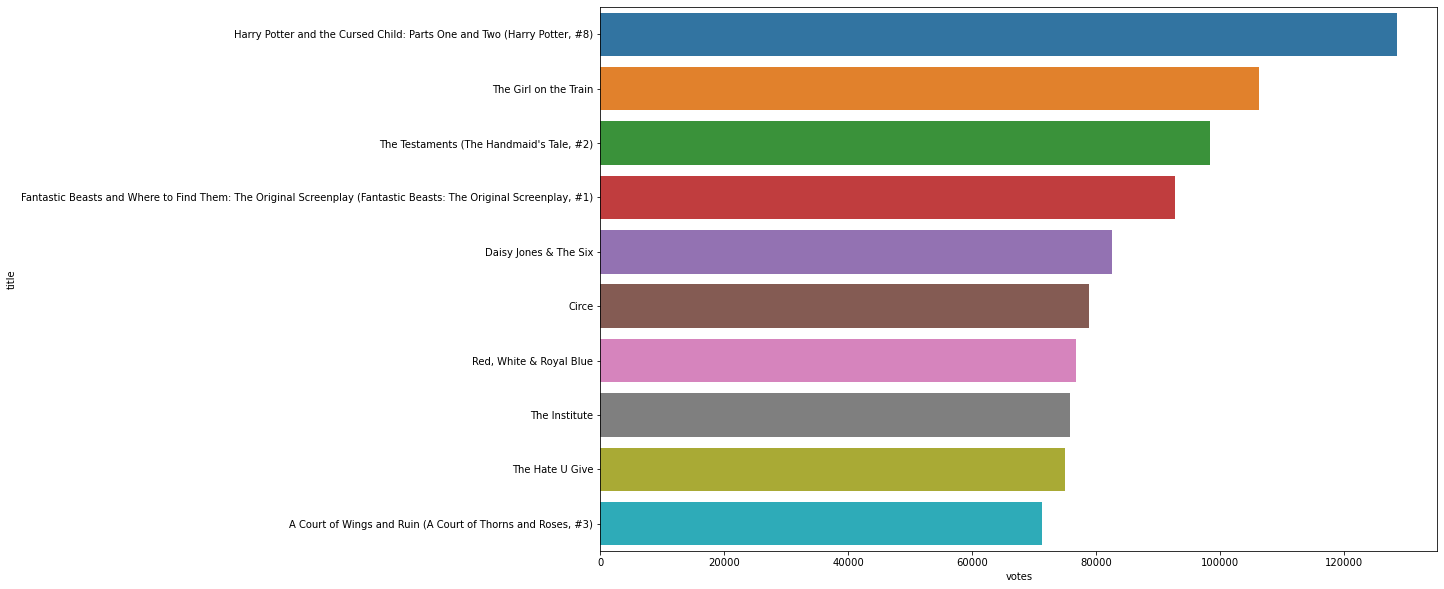

In [35]:
#do the awarded books have similar amount of votes? 
most_voted = awarded_books.sort_values('votes', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_voted['votes'], most_voted.index)

C:\Users\Navya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


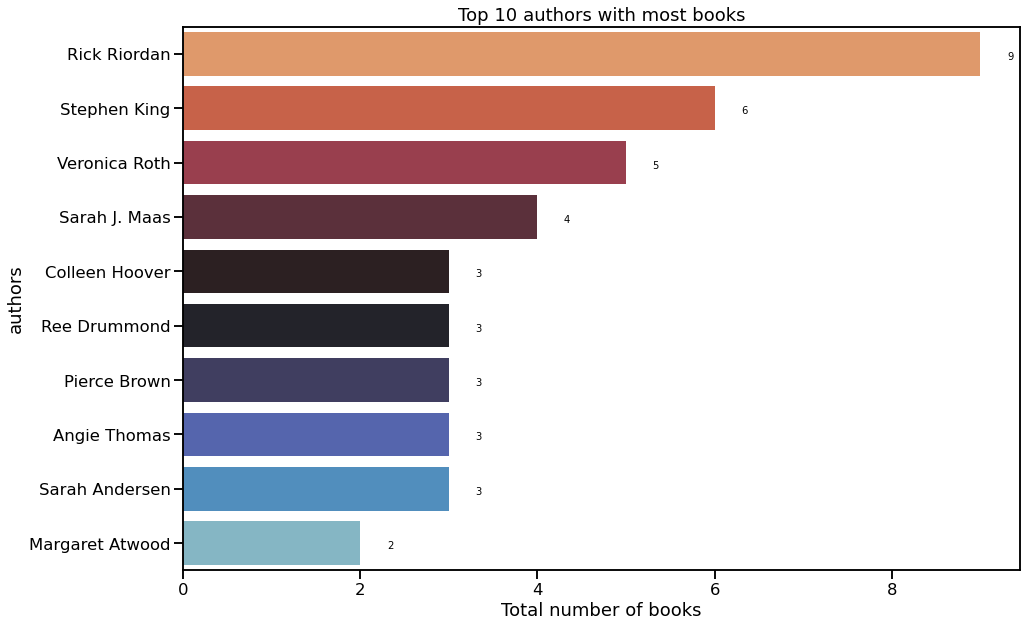

In [39]:
sns.set_context('talk')
most_books = awarded_books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [42]:
data['authors'].value_counts().head(10) #number of times authors nominated 

Ilona Andrews        15
Sarah J. Maas        14
Rick Riordan         13
Colleen Hoover       12
Brandon Sanderson    11
Richelle Mead        11
Cassandra Clare      10
Mark  Lawrence       10
Mo Willems            9
Maggie Stiefvater     9
Name: authors, dtype: int64

In [46]:
#average rating of rank 1 awarded books 
awarded_books.avg_rating.isnull().value_counts()

False    183
Name: avg_rating, dtype: int64

In [49]:
#remove null values
df.dropna(0, inplace=True)


<AxesSubplot:xlabel='avg_rating', ylabel='Count'>

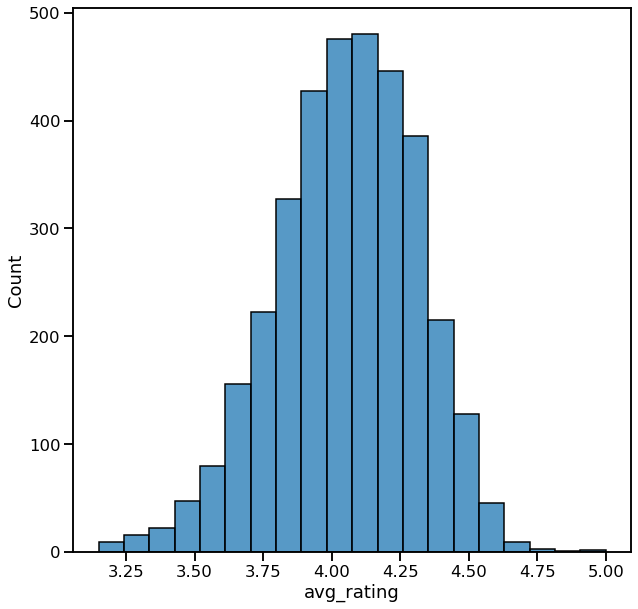

In [53]:
plt.figure(figsize=(10,10))
rating= df.avg_rating.astype(float)
sns.histplot(rating, bins=20)

<Figure size 1080x720 with 0 Axes>

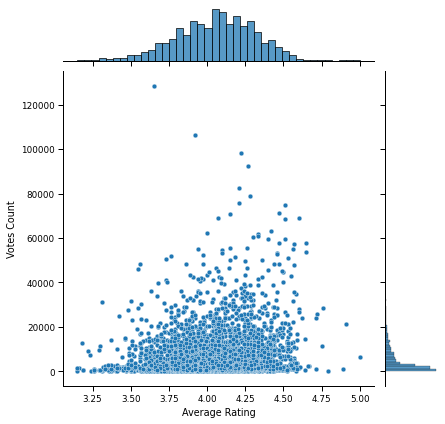

In [56]:
#investigate relationship between avg_rating and votes count

plt.figure(figsize=(15,10))
df.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="avg_rating",y='votes', kind='scatter',  data= df[['votes', 'avg_rating']])
ax.set_axis_labels("Average Rating", "Votes Count")
plt.show()

#most of the ratings lie between 3.75 and  4.5
#the plot is inconclusive to derive a relationship 


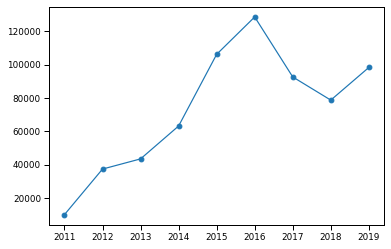

In [62]:

#see how number of votes were casted each year 
df_to_plot1 = df.groupby("year").agg(votes=("votes", "sum")).reset_index()

plt.figure()
plt.plot(df_to_plot1["year"], df_to_plot["votes"], "-o")
plt.show()



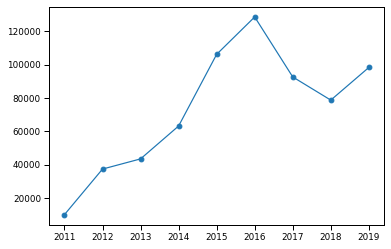

In [67]:
#how many votes were needed each year to win 
df_to_plot = df.loc[df["rank"]==1]\
               .sort_values(by="votes", ascending=False)\
               .drop_duplicates(subset="year")\
               .sort_values(by="year")

plt.figure()
plt.plot(df_to_plot["year"], df_to_plot["votes"], "-o")

plt.show()